In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] limma_3.50.3          forcats_0.5.2         stringr_1.5.0        
 [4] dplyr_1.1.0           purrr_1.0.1           readr_2.1.3          
 [7] tidyr_1.3.0           tibble_3.1.7          ggplot2_3.3.6        
[10] tidyverse_1.3.2       AnnotationDbi_1.56.2  IRanges_2.28.0       


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(limma)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [3]:
# load in data to be used
load(file = "pairwise_RData_files/pairwise_WGCNA_ADNI_allSubjects-01-dataInput.RData")

In [4]:
ls()

[1] "datExpr_CN_AD.gender_rin_corrected"  "datExpr_CN_MCI.gender_rin_corrected"
[3] "datExpr_MCI_AD.gender_rin_corrected" "datTraits_CN_AD"                    
[5] "datTraits_CN_MCI"                    "datTraits_MCI_AD"

## Filter datExpr by highly variable genes

In [5]:
datExpr_MCI_AD_variance <- data.frame(matrix(nrow = ncol(datExpr_MCI_AD.gender_rin_corrected), ncol = 1))
rownames(datExpr_MCI_AD_variance) <- colnames(datExpr_MCI_AD.gender_rin_corrected)
colnames(datExpr_MCI_AD_variance)  <- "Variance"

datExpr_MCI_AD_variance["Variance"] <- lapply(datExpr_MCI_AD.gender_rin_corrected, var) %>% unlist
datExpr_MCI_AD_variance$gene <- rownames(datExpr_MCI_AD_variance)

datExpr_MCI_AD_variance %>% head

,Variance,gene
,<dbl>,<chr>
11715100_at,0.03064969,11715100_at
11715101_s_at,0.03799969,11715101_s_at
11715102_x_at,0.02552589,11715102_x_at
11715103_x_at,0.07430910,11715103_x_at
11715104_s_at,0.02309194,11715104_s_at
11715105_at,0.01996390,11715105_at


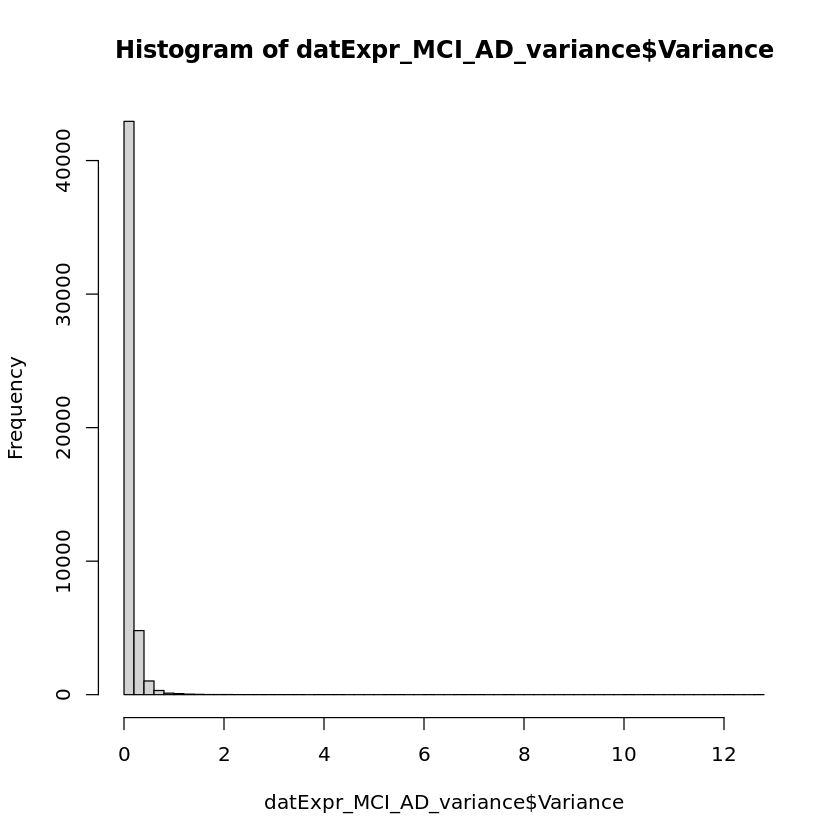

In [6]:
hist(datExpr_MCI_AD_variance$Variance, breaks = 50)

In [7]:
# identify top 20000 highly variable genes based on variance
datExpr_MCI_AD_HVGs <- (datExpr_MCI_AD_variance[order(datExpr_MCI_AD_variance$Variance, decreasing = TRUE), ])[1:20000,]
datExpr_MCI_AD_HVGs %>% head

# select HVGs from datExpr
datExpr_MCI_AD_selectHVGs <- datExpr_MCI_AD.gender_rin_corrected[, rownames(datExpr_MCI_AD_HVGs)]
datExpr_MCI_AD_selectHVGs %>% head

,Variance,gene
,<dbl>,<chr>
11756083_x_at,12.794560,11756083_x_at
11732801_at,12.085176,11732801_at
11755998_x_at,10.589665,11755998_x_at
11760799_x_at,10.197523,11760799_x_at
11732800_a_at,7.602243,11732800_a_at
11752660_a_at,7.166576,11752660_a_at


,11756083_x_at,11732801_at,11755998_x_at,11760799_x_at,11732800_a_at,11752660_a_at,11734979_at,11732901_a_at,11762641_x_at,11715316_x_at,⋯,11742723_a_at,11735803_a_at,11741523_x_at,11762217_at,11746551_a_at,11722693_at,11718264_a_at,11730033_a_at,11723185_s_at,11747673_a_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
006_S_4153,11.534137,2.820490,2.976117,9.879070,2.594907,2.392199,2.798943,9.182157,7.908208,8.228538,⋯,10.52231,5.464623,4.245494,3.262446,3.217298,7.037557,6.807458,2.913107,8.045620,2.743097
099_S_4205,2.081773,2.809663,9.002664,5.198770,2.446138,2.710325,6.677127,5.349576,7.864737,11.796798,⋯,10.38044,5.308112,4.266425,3.441802,3.422138,7.459515,6.852899,2.814359,7.662434,3.072280
007_S_4467,3.131323,2.193733,8.653752,5.440786,1.864972,1.953589,7.728674,3.483160,7.491801,8.449621,⋯,10.04297,5.202290,4.153637,3.138082,3.484946,7.477416,7.009103,3.064907,8.177547,2.920636
003_S_2374,4.817878,9.191161,9.013445,10.224902,7.816523,7.609374,8.225819,3.558051,7.882192,8.883593,⋯,10.81305,4.684290,4.083883,3.504923,2.933037,7.229688,6.620146,2.926278,8.082892,2.613914
031_S_2018,10.006215,9.430951,9.709570,4.160417,7.933018,7.628113,2.532989,3.091960,3.741874,9.328083,⋯,10.86202,5.368465,4.481309,3.283757,3.480727,6.748023,6.496209,2.944094,7.498973,2.862134
002_S_4654,10.897037,9.958631,2.902096,10.238751,7.969855,7.829544,6.557154,4.117525,8.100082,11.062721,⋯,10.45294,4.796103,4.210734,3.554819,3.212263,7.033083,6.698457,2.711794,8.086103,2.962039


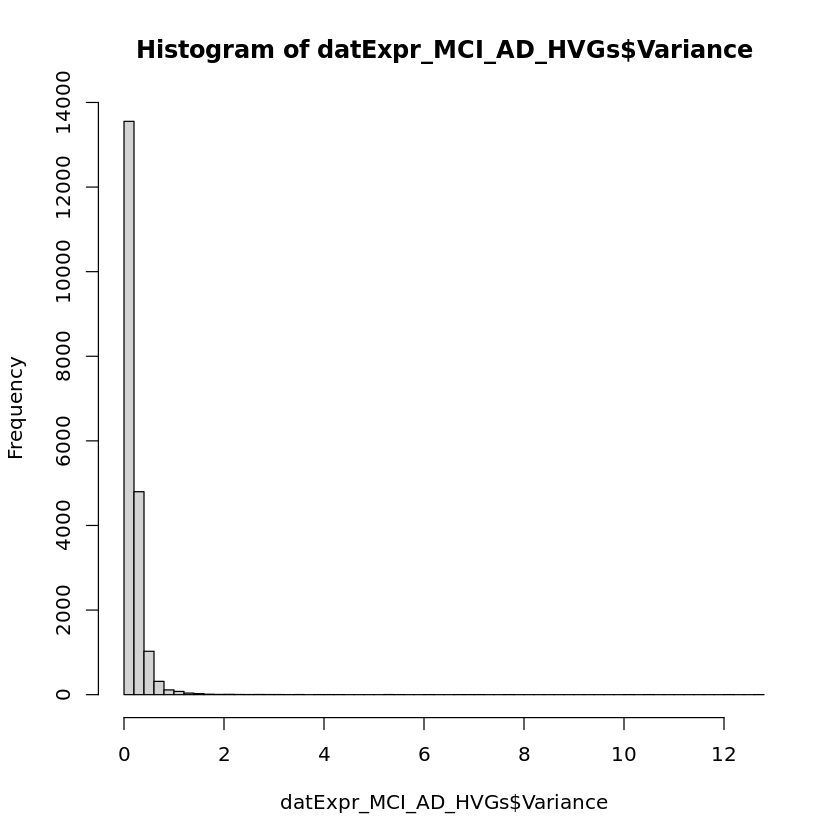

In [9]:
hist(datExpr_MCI_AD_HVGs$Variance, breaks = 50)

In [10]:
# save HVGs as RData
save(datExpr_MCI_AD_selectHVGs, file = "pairwise_RData_files/datExpr_MCI_AD_limmaCorrected_selectHVGs.RData")

In [11]:
# pick soft thresholding power
start <- Sys.time()
# Choose a set of soft-thresholding powers:
powers <- c(c(1:10), seq(from=12, to=20, by=2))
# Call the network topology function
sft <- pickSoftThreshold(datExpr_MCI_AD_selectHVGs, powerVector = powers, verbose = 5)
print(Sys.time() - start)

pickSoftThreshold: will use block size 2236.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 2236 of 20000


Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   ..working on genes 2237 through 4472 of 20000
   ..working on genes 4473 through 6708 of 20000
   ..working on genes 6709 through 8944 of 20000
   ..working on genes 8945 through 11180 of 20000
   ..working on genes 11181 through 13416 of 20000
   ..working on genes 13417 through 15652 of 20000
   ..working on genes 15653 through 17888 of 20000
   ..working on genes 17889 through 20000 of 20000
   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k. max.k.
1      1   0.0487 -0.283          0.909 3230.000  3.05e+03 6530.0
2      2   0.7230 -1.170          0.926  911.000  7.18e+02 3140.0
3      3   0.8230 -1.420          0.926  347.000  2.14e+02 1800.0
4      4   0.8710 -1.470          0.948  159.000  7.32e+01 1140.0
5      5   0.8980 -1.490          0.965   82.900  2.82e+01  772.0
6      6   0.9060 -1.510          0.973   47.100  1.17e+01  553.0
7      7   0.9050 -1.520          0.974   28.600  5.24e+00  409.0
8      8   0.9020 -1.540          0.974   18.200  2.51e+00  310.0
9    

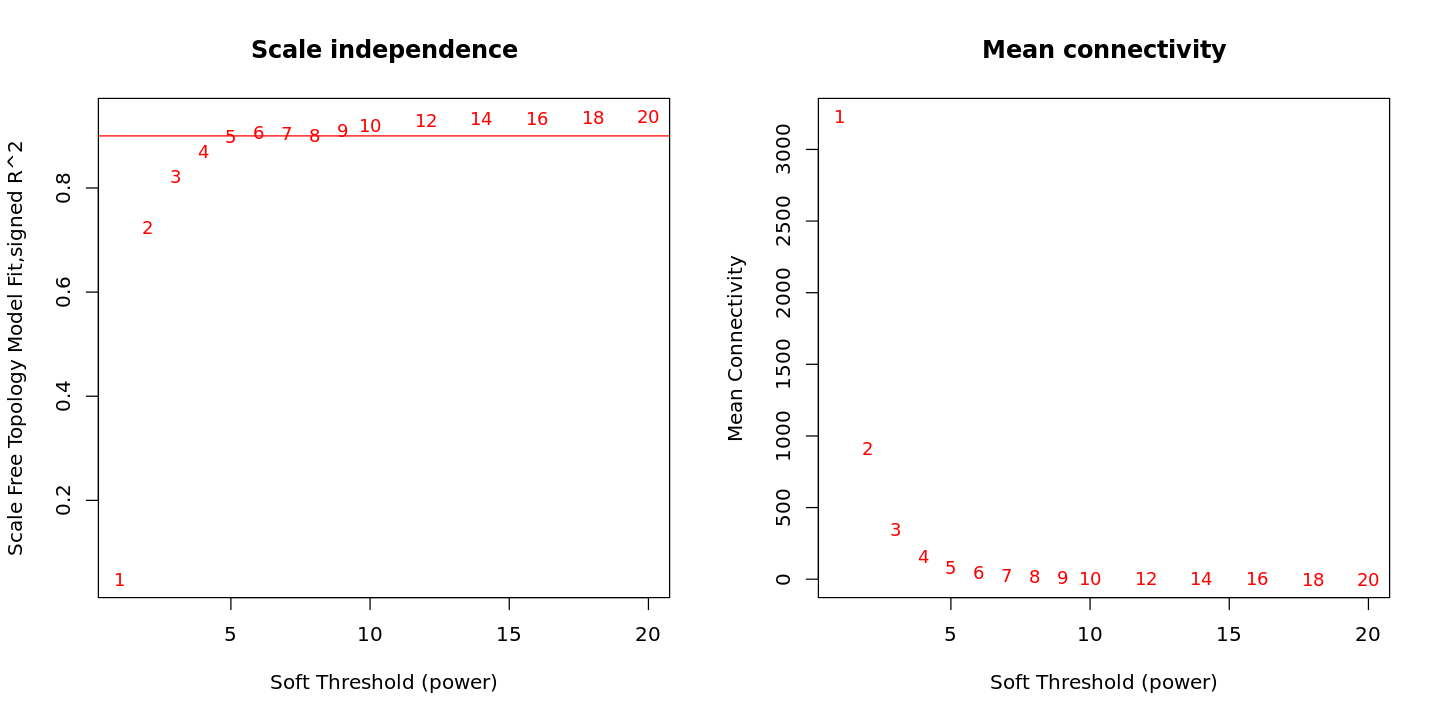

In [12]:
options(repr.plot.width=12, repr.plot.height=6)
# Plot results from soft-thresholding powers
par(mfrow = c(1,2));
cex1 = 0.9;

# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");

# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")

# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

# Trying power = 5

## Co-expression similarity and adjacency

In [13]:
start <- Sys.time()
softPower <- 5
adjacency <- WGCNA::adjacency(datExpr_MCI_AD_selectHVGs, 
                              power = softPower)
print(Sys.time() - start)

Time difference of 23.19769 mins


In [14]:
adjacency %>% head

,11756083_x_at,11732801_at,11755998_x_at,11760799_x_at,11732800_a_at,11752660_a_at,11734979_at,11732901_a_at,11762641_x_at,11715316_x_at,⋯,11742723_a_at,11735803_a_at,11741523_x_at,11762217_at,11746551_a_at,11722693_at,11718264_a_at,11730033_a_at,11723185_s_at,11747673_a_at
11756083_x_at,1.000000e+00,4.941930e-12,1.173470e-03,8.757550e-07,8.745030e-11,3.639093e-10,1.258401e-06,2.105904e-08,7.422872e-03,1.090107e-03,⋯,3.985663e-07,4.666997e-07,6.842441e-07,1.055798e-10,1.966138e-06,1.505127e-11,3.915236e-07,2.448575e-06,1.766728e-07,2.115426e-09
11732801_at,4.941930e-12,1.000000e+00,3.523050e-06,2.156135e-06,9.808867e-01,9.775849e-01,6.356766e-08,4.503322e-17,2.701958e-08,1.317258e-06,⋯,3.130222e-05,3.894430e-06,1.911691e-05,3.998329e-06,1.172578e-06,1.964637e-08,1.256406e-09,2.560507e-08,1.208803e-09,4.468871e-10
11755998_x_at,1.173470e-03,3.523050e-06,1.000000e+00,5.002601e-06,3.701951e-06,3.449272e-06,4.109593e-09,4.260342e-06,3.095912e-02,1.265380e-04,⋯,1.699720e-15,1.092452e-07,1.506636e-08,2.750591e-08,8.455004e-07,1.674223e-09,4.156742e-07,3.114778e-09,5.853523e-06,1.094302e-08
11760799_x_at,8.757550e-07,2.156135e-06,5.002601e-06,1.000000e+00,2.221469e-06,3.551049e-06,1.507022e-07,9.090310e-08,4.894162e-06,3.554812e-07,⋯,1.574355e-06,1.837653e-11,1.057856e-06,1.240334e-12,1.564276e-06,2.263133e-05,1.459284e-07,1.895816e-11,5.769839e-06,6.240136e-08
11732800_a_at,8.745030e-11,9.808867e-01,3.701951e-06,2.221469e-06,1.000000e+00,9.894463e-01,6.000227e-08,9.039173e-15,2.290323e-08,1.064340e-06,⋯,3.719201e-05,5.412388e-06,2.397042e-05,4.099456e-06,1.844235e-06,3.740914e-08,1.859741e-10,2.559209e-08,3.034992e-09,5.954558e-10
11752660_a_at,3.639093e-10,9.775849e-01,3.449272e-06,3.551049e-06,9.894463e-01,1.000000e+00,2.698038e-08,5.040186e-17,3.996650e-08,7.705025e-07,⋯,3.970243e-05,4.960643e-06,2.358830e-05,3.587317e-06,1.777702e-06,1.583821e-08,1.522018e-09,1.949858e-08,3.699214e-09,4.760072e-10


In [15]:
# save output so I don't have to keep loading the whole workspace
adjacency_MCI_AD <- adjacency
save(adjacency_MCI_AD, file = "pairwise_RData_files/20230418_adjacency_MCI_AD.RData")

## Topological overlap matrix

In [16]:
# Turn adjacency into topological overlap
start <- Sys.time()
TOM = TOMsimilarity(adjacency);
dissTOM = 1-TOM 
print( Sys.time() - start )

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
Time difference of 34.21364 secs


In [17]:
dissTOM_MCI_AD <- dissTOM
save(dissTOM_MCI_AD, file = "pairwise_RData_files/20230418_dissTOM_MCI_AD.RData")

## Clustering using TOM

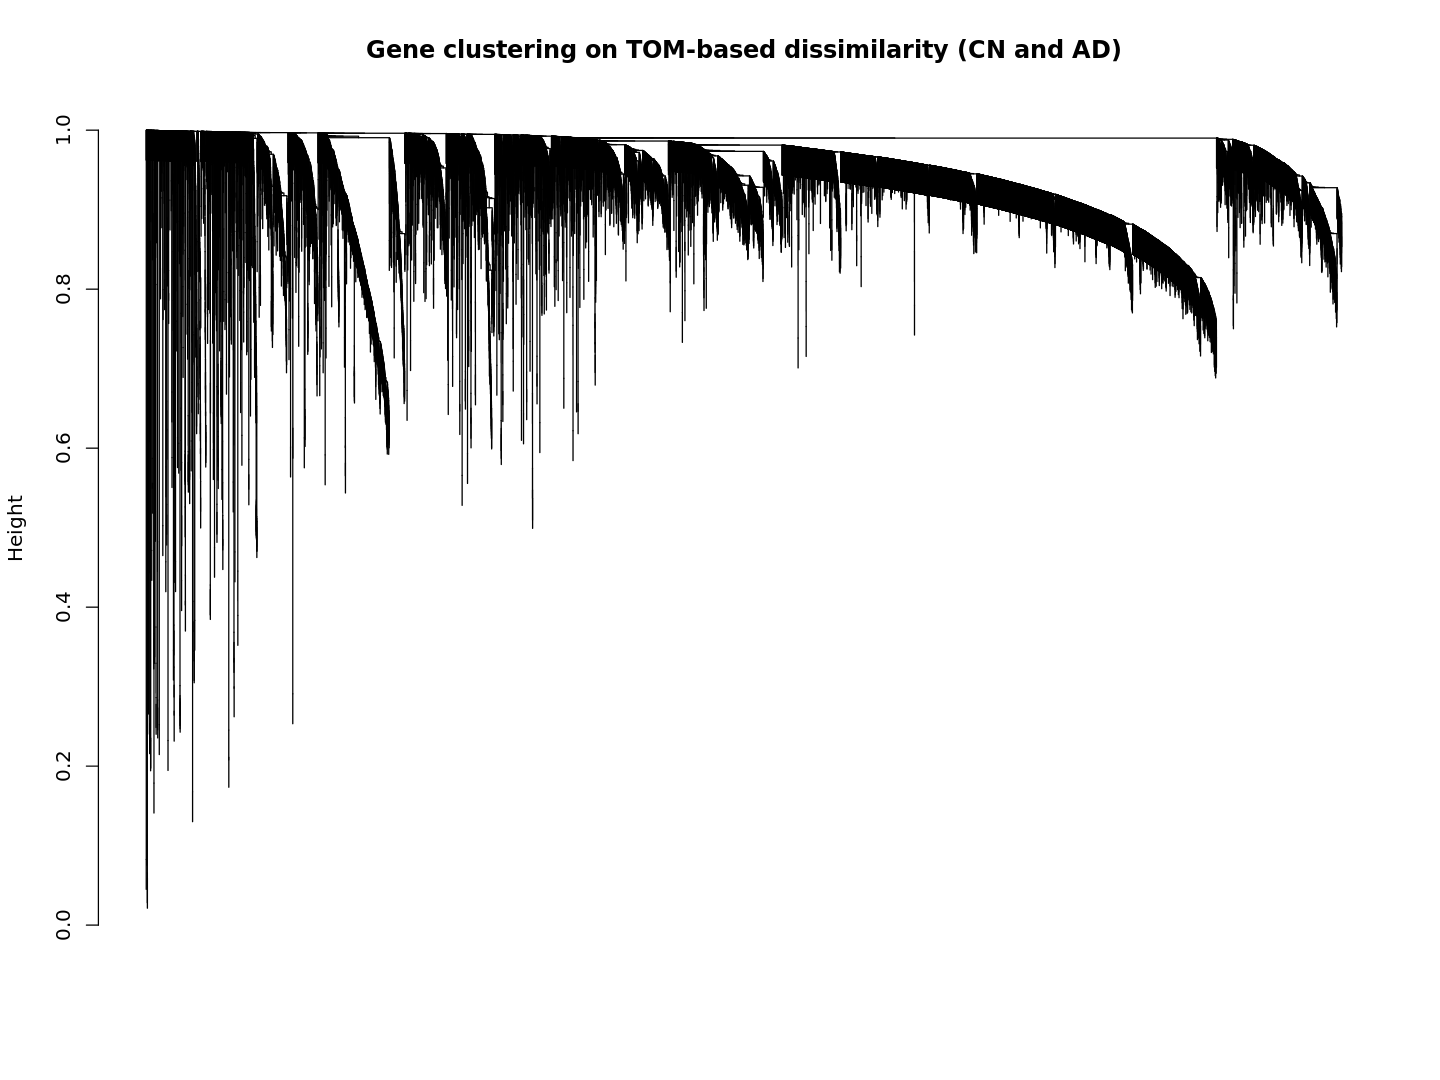

In [18]:
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");

# Plot the resulting clustering tree (dendrogram)
options(repr.plot.width = 12, repr.plot.height = 9)
plot(geneTree, xlab="", sub="", 
     main = "Gene clustering on TOM-based dissimilarity (CN and AD)",
     labels = FALSE, hang = 0.04);

In [19]:
# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 30;
# Module identification using dynamic tree cut:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
                            deepSplit = 2, pamRespectsDendro = FALSE,
                            minClusterSize = minModuleSize);
table(dynamicMods) # 30 modules

 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 199 7206 3458 1222 1063  777  582  531  473  467  396  367  336  332  293  281 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30 
 270  203  198  195  178  151  147  120  119  116   89   87   64   49   31 

dynamicColors
        black          blue         brown          cyan     darkgreen 
          531          3458          1222           293           147 
     darkgrey    darkorange       darkred darkturquoise         green 
          119            89           151           120           777 
  greenyellow          grey        grey60     lightcyan    lightgreen 
          367           199           203           270           198 
  lightyellow       magenta  midnightblue        orange          pink 
          195           467           281           116           473 
       purple           red     royalblue   saddlebrown        salmon 
          396           582           178            49           332 
      skyblue     steelblue           tan     turquoise         white 
           64            31           336          7206            87 
       yellow 
         1063 

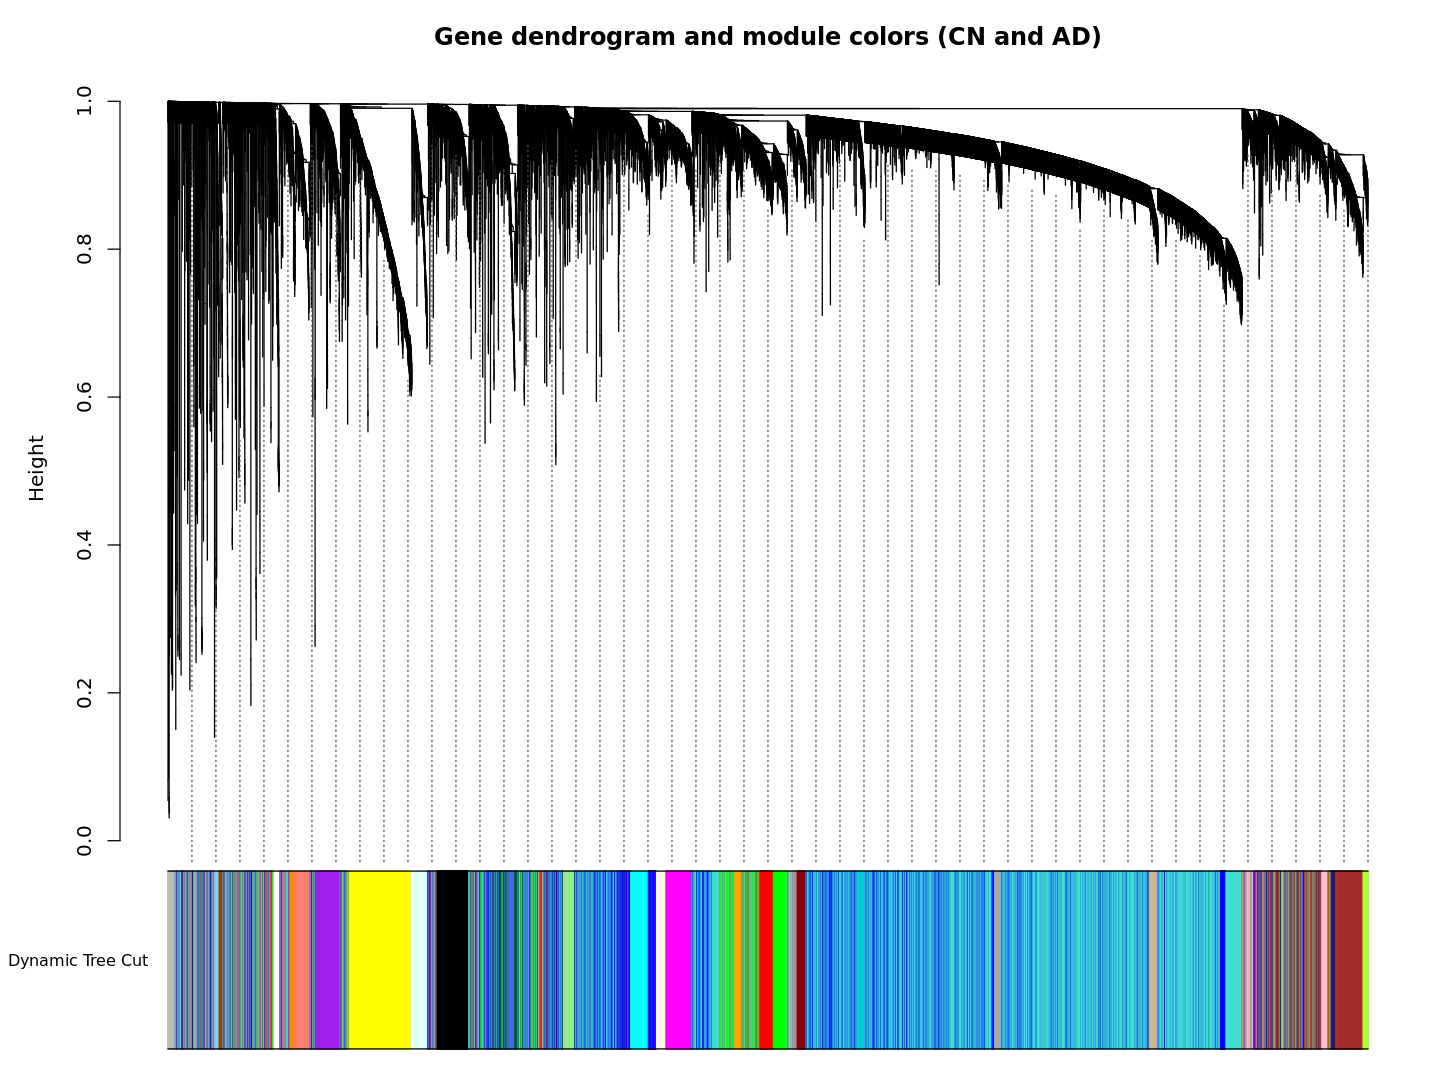

In [20]:
# Convert numeric lables into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)
# Plot the dendrogram and colors underneath
#sizeGrWindow(8,6)
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors (CN and AD)")

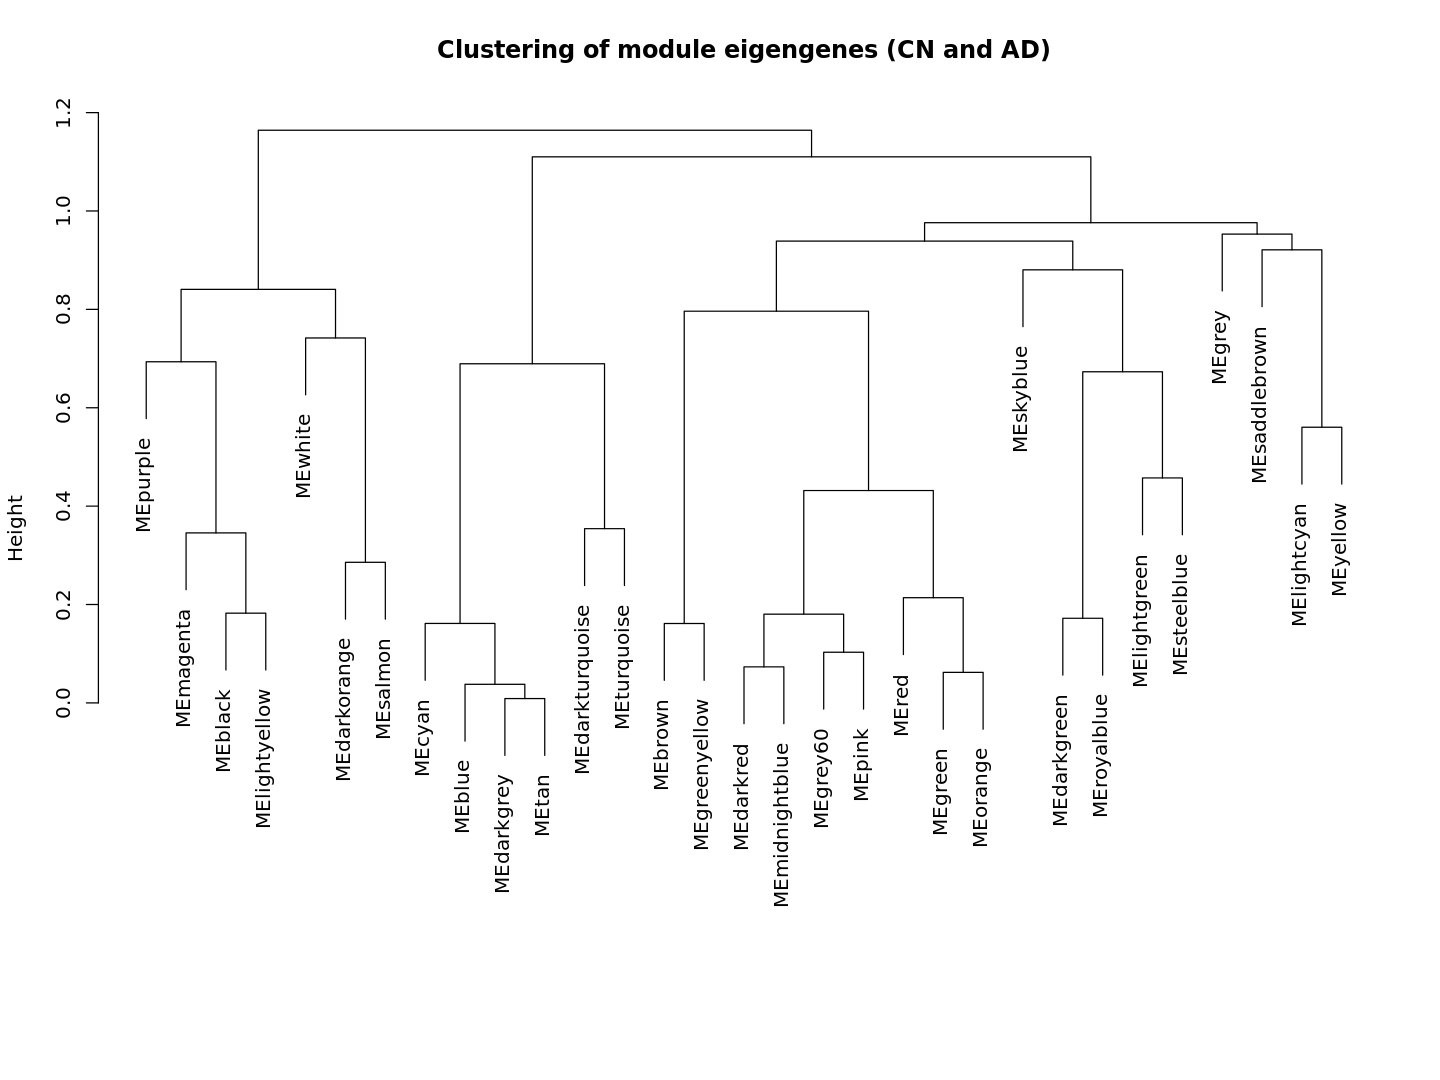

In [21]:
# Calculate eigengenes
MEList = moduleEigengenes(datExpr_MCI_AD_selectHVGs, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");
# Plot the result
# sizeGrWindow(7, 6)
plot(METree, main = "Clustering of module eigengenes (CN and AD)",
     xlab = "", sub = "")

## Merge modules with similar expression profiles

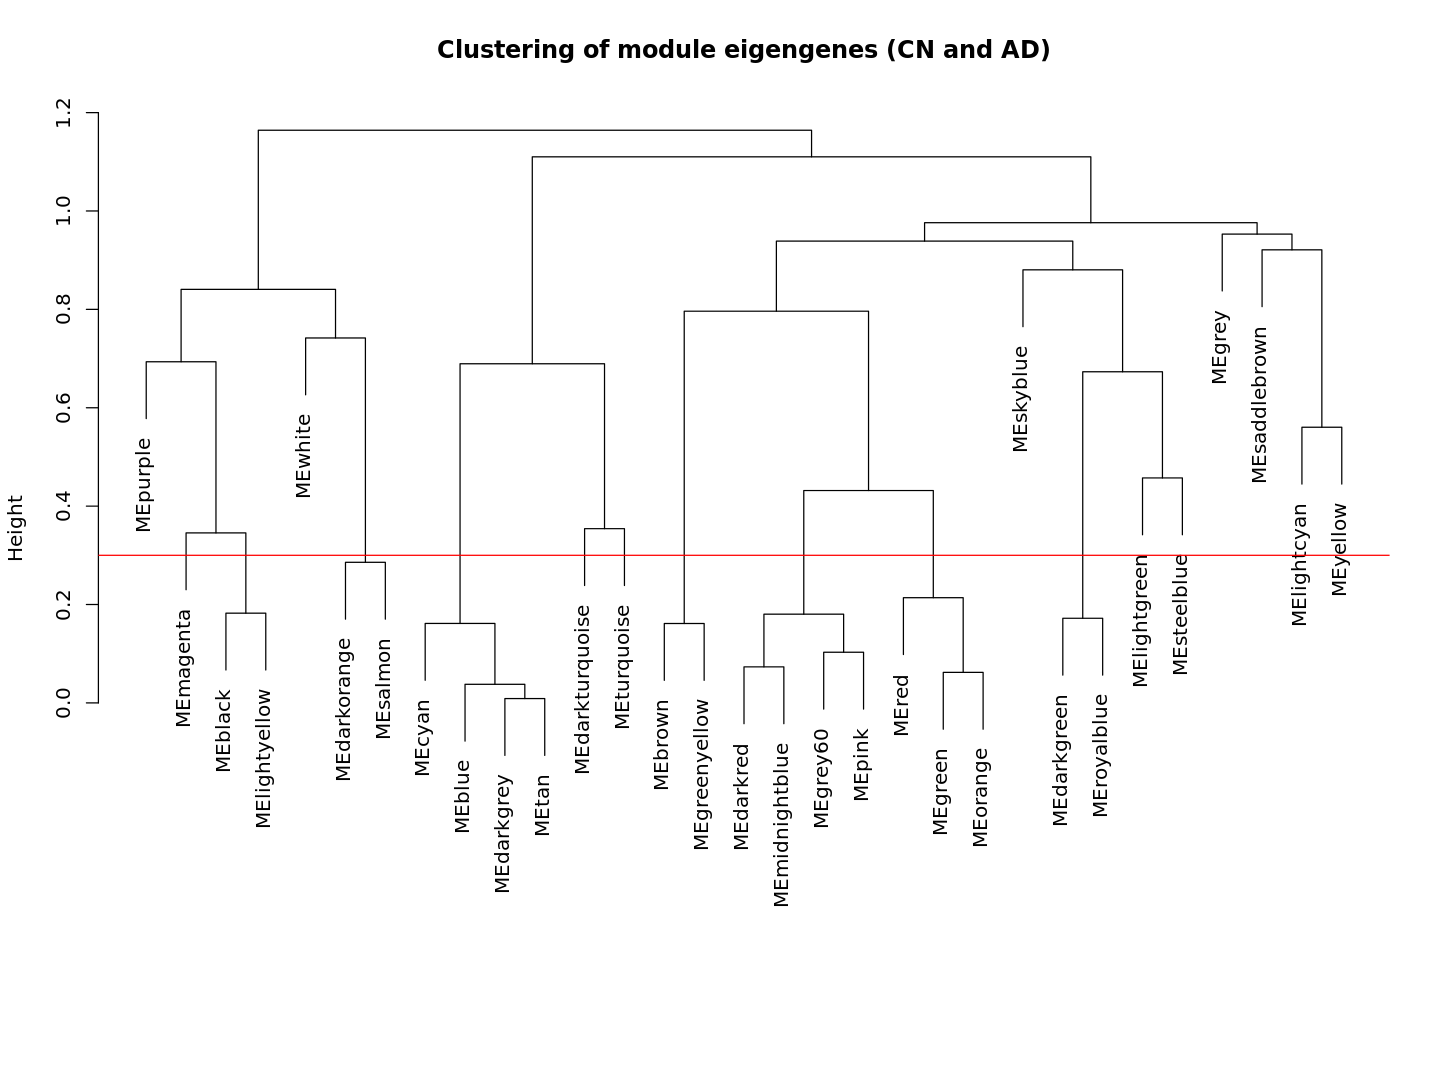

In [38]:
options(repr.plot.width = 12, repr.plot.height = 9)

plot(METree, main = "Clustering of module eigengenes (CN and AD)",
     xlab = "", sub = "")

MEDissThres = 0.3
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

In [39]:
pdf(file = "pairwise_plots/merge_modules_MCI_AD_limmaCorrected.pdf", width = 12, height = 9)

plot(METree, main = "Clustering of module eigengenes (CN and AD)",
     xlab = "", sub = "")

MEDissThres = 0.3
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

dev.off()

png 
  2

In [40]:
# Call an automatic merging function
start <- Sys.time()
merge = mergeCloseModules(datExpr_MCI_AD_selectHVGs, dynamicColors, 
                          cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;
print(Sys.time() - start)

 mergeCloseModules: Merging modules whose distance is less than 0.3
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 31 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 19 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 18 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 18 module eigengenes in given set.
Time difference of 18.84871 secs


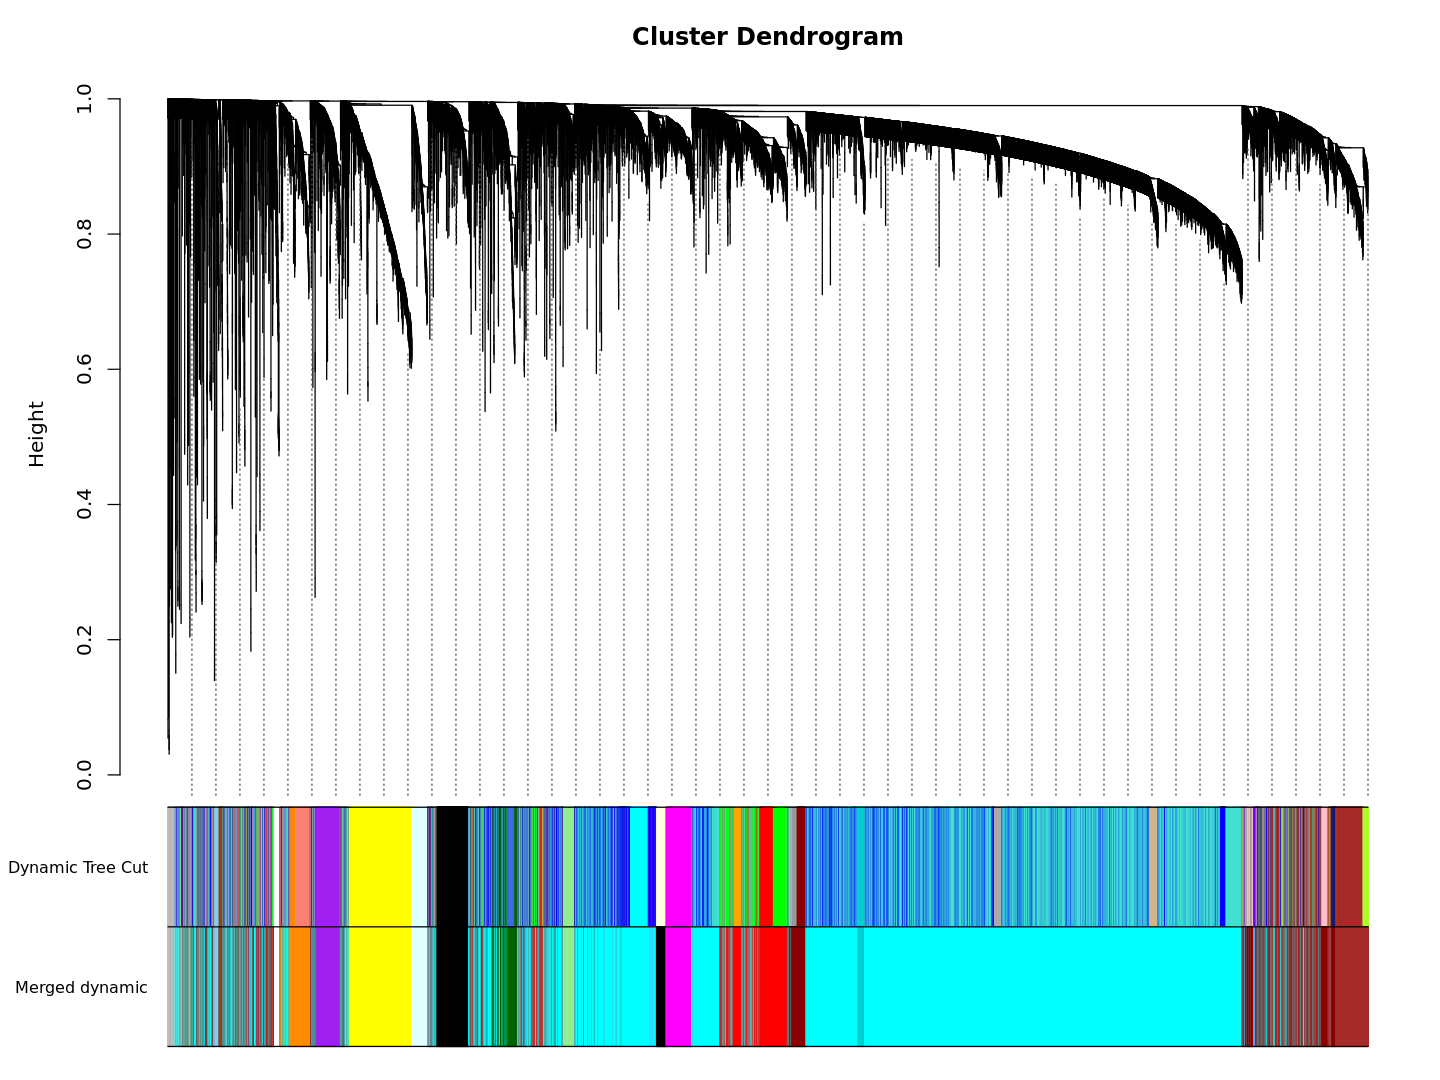

In [41]:
options(repr.plot.width = 12, repr.plot.height = 9)
# sizeGrWindow(12, 9)
#pdf(file = "Plots/geneDendro-3.pdf", wi = 9, he = 6)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
#dev.off()

In [42]:
pdf(file = "pairwise_plots/MCI_AD_limmaCorrected_geneDendro-3.pdf", wi = 12, he = 9)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
dev.off()

png 
  2

In [43]:
# Rename to moduleColors
moduleColors_MCI_AD = mergedColors
# Construct numerical labels corresponding to the colors
colorOrder = c("grey", standardColors(50));
moduleLabels_MCI_AD = match(moduleColors_MCI_AD, colorOrder)-1;
MEs_MCI_AD = mergedMEs;
geneTree_MCI_AD = geneTree;

# Save module colors and labels for use in subsequent parts
save(MEs_MCI_AD, moduleLabels_MCI_AD, moduleColors_MCI_AD, geneTree_MCI_AD, file = "pairwise_RData_files/20230418_MCI_AD_limmaCorrected-02-networkConstruction-stepByStep.RData")